# CS 4453 Gamblers Problem Assignment
#### Thais Minet
http://incompleteideas.net/sutton/book/ebook/node44.html

### Exercise 4.7 
#### Why does the optimal policy for the gambler's problem have such a curious form? In particular, for capital of 50 it bets it all on one flip, but for capital of 51 it does not. Why is this a good policy?
When the gambler has a capital of 50 the optimal policy is to bet everything since at that point if you win then you reach 100. This can also be seen when at 25 you bet 25 to attempt to reach 50 and at 75 you bet 25 to attempt to reach 100. Also each point halfway between 0 and 25, 25 and 50, 50 and 75, 75 and 100 the optimal policy is to bet the amount to get to 25, 50, 75 or 100. Overall, this suggests that the policy is trying to get to 100 in the fewest number of coin flips when p=0.4. This is a good policy because it reduces the amount of time spent flipping the coin. The more times you flip the coin the higher chance you will lose.

### Exercise 4.8
It appears that the problem is stable as theta -> 0 since the policy does not change much the smaller you make theta. It also appears that there are some rounding errors when calculating p = 0.40 since the policy is the same as in the book except for when there is low capital. This appears to also have happened when p = 0.25.

In [200]:
import matplotlib.pyplot as plt
# calculates the value for the iteration
def bellman(s, a, V, gamma, p):
    sHeads = s + a
    sTails = s - a
    
    vReturn = p*V[sHeads] + (1-p)*V[sTails]
    
    return vReturn

def valueIteration(p, theta):
    gamma = 1
    numNonTermStates = 99
    numStates = 101

    # initialize V with all 0s
    V = [0 for i in range(numStates)]
    V[0] = 0 # no money left
    V[-1] = 1 # Final state of 100 has value +1 
    
    # start delta at inf
    delta = float("inf")
    numIterations = 0
    plot = [1, 2, 3, 32]
    x = [i for i in range(0, 101)] # for plotting

    while delta > theta:
        numIterations += 1
        delta = 0
        for Si in range(1, numStates-1):
            v = V[Si]
            s = Si

            actions = [i for i in range(1, min(s, (numStates-1)-s)+1)]
            Q = [-100 for i in range(0, len(actions))]

            for Ai in range(0, len(actions)):
                Q[Ai] = bellman(s, actions[Ai], V, gamma, p)

            V[Si] = max(Q)
            delta = max(delta, abs(v-V[Si]))
        
        # plot iterations 1,2,3,32
        if numIterations in plot:
            plt.plot(x, V)

    print("Number of Iterations is " + str(numIterations))

    plt.xlabel("Capital")
    plt.ylabel("Value Estimates")
    plt.show()

    
    policy = [0 for i in range(numStates - 2)]
    # make the policy by updating only if the new policy beats the old by at least 1.0e-5
    # for each state
    for Si in range(1, numStates-1):
        s = Si
        actions = [i for i in range(1, min(s, (numStates-1)-s+1))]
        Q = [-100 for i in range(len(actions))]
        bestV = float("-inf")
        bestA = 0
        # for each action in the state
        for Ai in range(1, len(actions)):
            Q[Ai] = bellman(s, actions[Ai], V, gamma, p)
            # only change the policy if it is better by at least 1.0e-5
            if bestV < (Q[Ai] - 1.0e-5):
                bestV = Q[Ai]
                bestA = Ai

        policy[Si-1] = bestA

    plt.plot([i for i in range(1,100)], policy)
    plt.xlabel("Capital")
    plt.ylabel("Last Policy (Stake)")
    plt.show()


##### Gamblers problem p = 0.4

Number of Iterations is 15


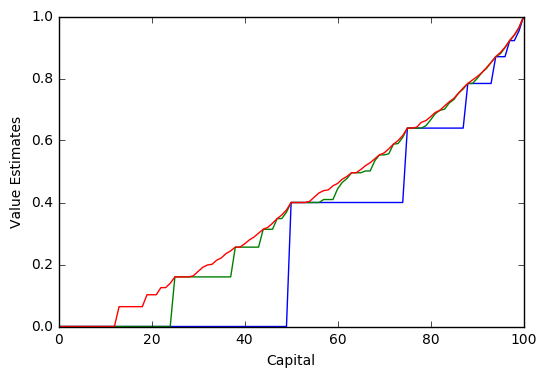

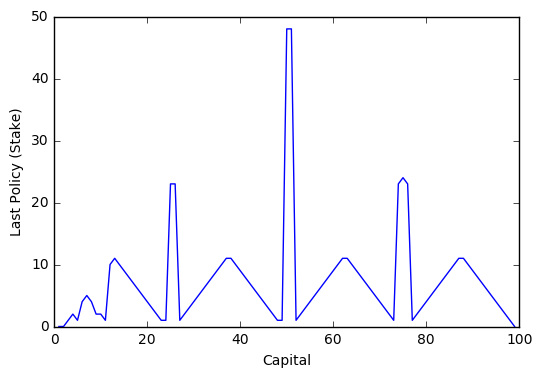

In [201]:
valueIteration(0.4, 1.0e-8)

##### Gamblers problem p = 0.25

Number of Iterations is 13


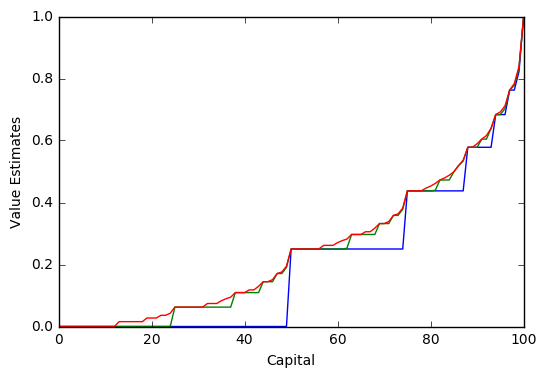

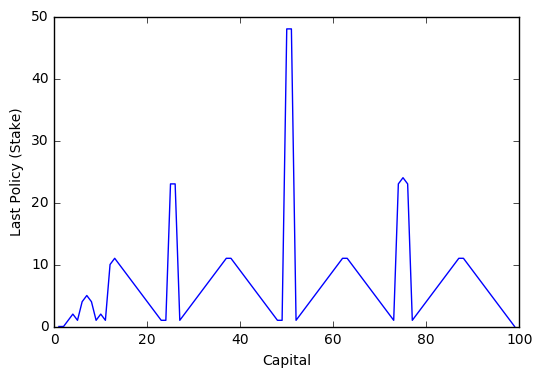

In [202]:
valueIteration(0.25, 1.0e-8)

##### Gamblers problem p = 0.55

Number of Iterations is 1417


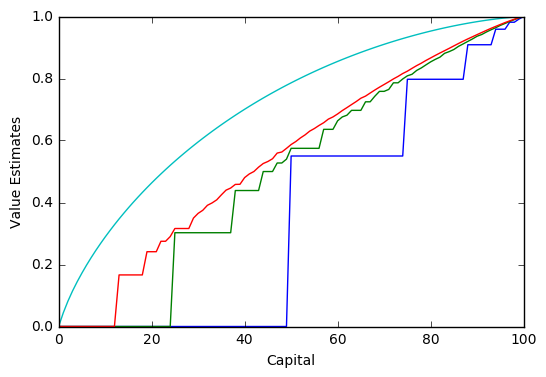

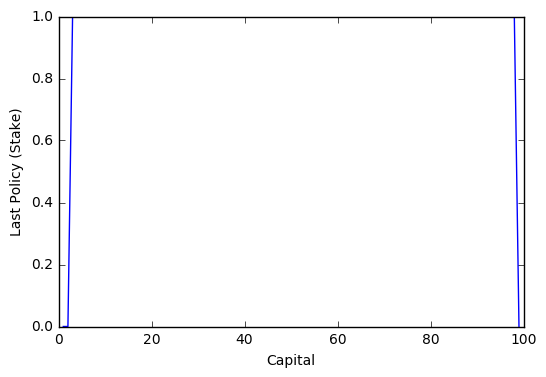

In [203]:
valueIteration(0.55, 1.0e-8)

#### Exercise 4.9


$Q_{k+1} = \sum_{s'}P_{ss'}^{a}[R_{ss'}^{a} + \gamma {max}_{a'}Q_{k}(s',a')]$